In [1]:
from Tools import *
from photoObject import *
import emcee
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits
import xmatch
from Tools import *
from sTools import *

sns.set_theme(style="white",font_scale = 1.5)


In [15]:
def angstromTokms(centralA,As):
    c=299792
    v=c*(As-centralA)/centralA
    return v+c


print(angstromTokms(8500,1.9))
print(kmsToangstrom(70,8500))


67.01232941175113
1.984709398515406


In [3]:

Fresco=ReadCatalogs("../Catalogs/Fresco.cat")
Fresco2=fits.open("../Catalogs/fresco_prelim.fits")

Zdic={}
#for gal in Fresco:
#    if gal["z_spec"]>0 and gal["max_line_sn"]>8:
#        Zdic["N-"+str(gal["id"])]=[gal["z_spec"],gal["z_map"],[gal["ra"],gal["dec"]],gal["max_line_sn"]]

for gal in Fresco2[1].data:
    if gal["z_spec"]>0 and gal["max_line_sn"]>8:
        Zdic["S-"+str(gal["id"])]=[gal["z_spec"],gal["z_map"],[gal["ra"],gal["dec"]],gal["max_line_sn"]]



In [43]:
#Fresco=fits.open("../Catalogs/fresco_gds_v8.fits")
Fresco=fits.open("../Catalogs/fresco_only_s_v2.fits")
Zdic={}
for gal in Fresco[1].data:
    if gal["z_spec"]>0 and gal["max_line_sn"]>8:
        Zdic["S-"+str(gal["id"])]=[gal["z_spec"],gal["z_map"],[gal["ra"],gal["dec"]],gal["max_line_sn"]]

In [44]:
list(Fresco[1].data["z_spec"])

[-1.0,
 -1.0,
 1.610360026359558,
 -1.0,
 0.8403919339179993,
 9.43156392626396,
 1.09661066532135,
 -1.0,
 7.5752,
 1.0175482034683228,
 -1.0,
 -1.0,
 -1.0,
 7.6631,
 -1.0,
 0.8406476633203834,
 7.2406,
 7.2349,
 7.19738,
 -1.0,
 1.60980057578037,
 -1.0,
 6.93257,
 -1.0,
 -1.0,
 6.7973,
 -99.0,
 6.7895,
 -1.0,
 -99.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 1.09631931147921,
 -1.0,
 -1.0,
 1.60968446359228,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 1.0052900314331055,
 -1.0,
 -1.0,
 -1.0,
 6.3139,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 1.09627644952582,
 -1.0,
 -1.0,
 6.268,
 -1.0,
 6.2651,
 -1.0,
 -1.0,
 1.609,
 -1.0,
 -1.0,
 1.0174959897994995,
 -1.0,
 6.10612103702878,
 -1.0,
 -1.0,
 6.10085,
 -1.0,
 6.09862182980839,
 -1.0,
 6.0019,
 -1.0,
 5.997089862823486,
 -1.0,
 -1.0,
 5.97702958248177,
 -1.0,
 -1.0,
 -1.0,
 1.09625108975269,
 5.949772357940674,
 -1.0,
 -1.0,
 5.944,
 -1.0,
 5.93956040694176,
 -1.0,
 -1.0,
 5.9322,
 -1.0,
 5.92512081650039,
 -1.0,
 -1.0,
 5.9232,
 -1.0,
 -1.0,
 -99.0,
 -1.0,
 5.92043,


In [45]:
z_fresco,z_spec,dz,coord,sn,id=[],[],[],[],[],[]
for k in Zdic.keys():
    #print(k,Zdic[k][0])
    z_spec.append(Zdic[k][0])
    z_fresco.append(Zdic[k][1])
    dz.append(Zdic[k][0]-Zdic[k][1])
    coord.append(Zdic[k][2])
    sn.append(Zdic[k][3])
    id.append(k)
    #print(Zdic[k][0],Zdic[k][1])

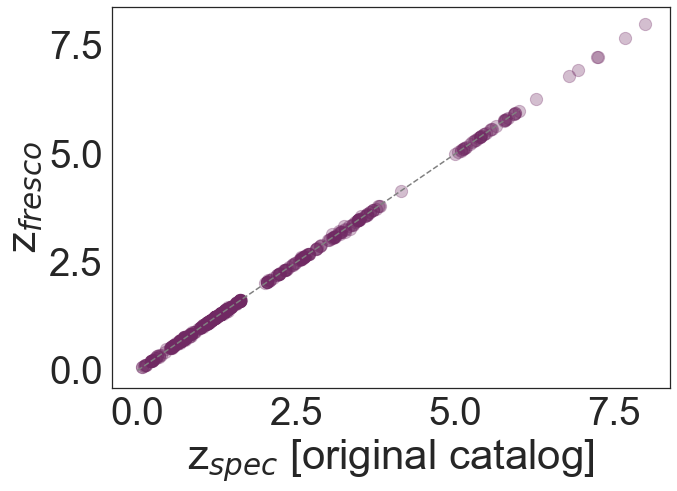

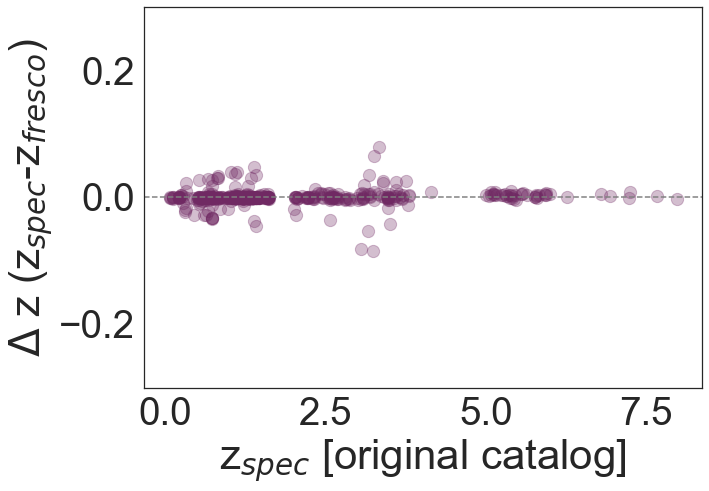

In [46]:
sns.set_theme(style="white",font_scale = 3.5)
plt.rcParams["figure.figsize"] = (10,7)

plt.scatter(z_spec,z_fresco,color="#702963",alpha=0.3,s=150)
plt.plot([0,6],[0,6],ls="--",color="gray")
plt.ylabel(r"z$_{fresco}$")
plt.xlabel(r"z$_{spec}$ [original catalog]")
plt.show()

plt.scatter(z_spec,dz,color="#702963",alpha=0.3,s=150)
plt.axhline(y=0,ls="--",color="gray")
plt.ylabel(r"$\Delta$ z (z$_{spec}$-z$_{fresco}$)")
plt.xlabel(r"z$_{spec}$ [original catalog]")
plt.ylim(-0.3,0.3)
plt.show()

In [47]:
#for k in Zdic.keys():
#    print(k,Zdic[k][1])

linesDic={"Oii":3728.815,"Siii":9068.600,"Ha":6562.819,"Pb":12821.6,"Pa":18756.1}

WavesLines=[]
for k in Zdic.keys():
    WavesLines.append(GiveLine(Zdic[k][0],linesDic,k))


S-31059 1.610360026359558 Pa
S-12271 6.2651 Ha
S-15318 5.997089862823486 Ha
S-14841 5.944 Ha
S-10539 5.93956040694176 Ha
S-10911 5.92512081650039 Ha
S-6782 5.9232 Ha
S-16340 5.83053867868813 Ha
S-7860 5.79809262430579 Ha
S-20559 5.7871198654174805 Ha
S-15043 5.7803924718181 Ha
S-23341 5.767789840698242 Ha
S-18451 5.76265 Ha
S-19079 5.63964582543504 Ha
S-19297 5.581242084503174 Ha
S-10583 5.56673 Ha
S-9413 5.55100891062149 Ha
S-13165 5.4789726636893 Ha
S-15190 5.45138117702238 Ha
S-13601 5.4448 Ha
S-24746 5.404739856719971 Ha
S-24747 5.404739856719971 Ha
S-24110 5.390210151672363 Ha
S-11160 5.3864 Ha
S-5557 5.3826 Ha
S-8019 5.35579899040702 Ha
S-25856 5.325109958648682 Ha
S-18138 5.315549850463867 Ha
S-24507 5.296319961547852 Ha
S-11731 5.267802 Ha
S-9038 5.233689308166504 Ha
S-23594 5.1628899574279785 Ha
S-18788 5.143292427062988 Ha
S-15144 5.129591941833496 Ha
S-16878 5.125502586364746 Ha
S-13593 5.114287853240967 Ha
S-9383 5.080356121063232 Ha
S-9382 5.080356121063232 Ha
S-20492 5.04

Pa -0.0001511076705933423 0.007344282988825882
Pb -0.00028849554443377556 0.006981876885278895
Siii 0.001311687015519869 0.01777256440125361


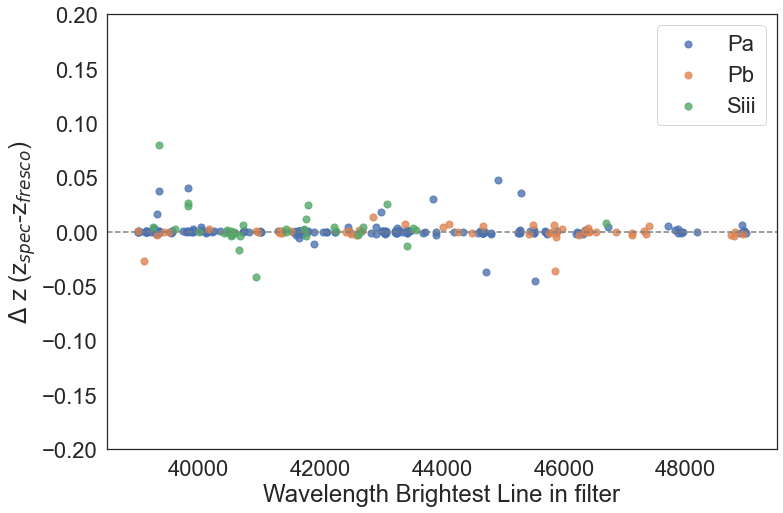

Pa -0.0001511076705933423 0.007344282988825882
Pb -0.00028849554443377556 0.006981876885278895
Siii 0.001311687015519869 0.01777256440125361
Ha 0.003635816500390021 0.0029109349096379986


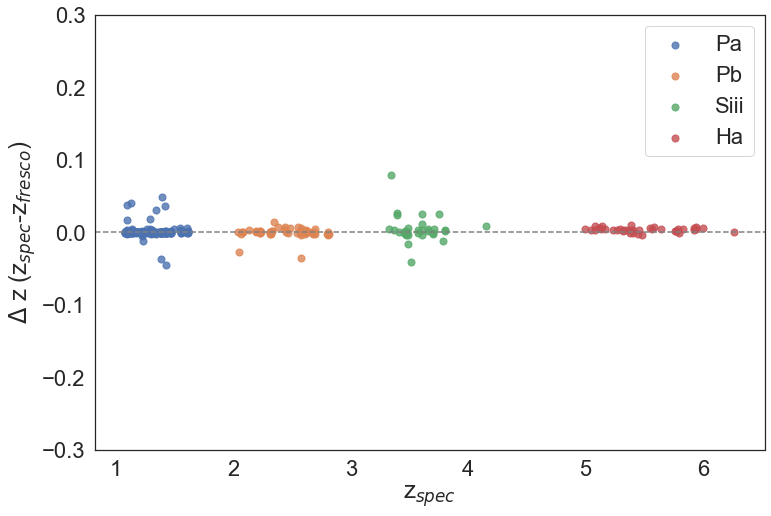

In [48]:
All_data={"Pa":[],"Pb":[],"Siii":[],"Ha":[]}
All_dz={"Pa":[],"Pb":[],"Siii":[],"Ha":[]}
All_zspec={"Pa":[],"Pb":[],"Siii":[],"Ha":[]}
All_voff={"Pa":[],"Pb":[],"Siii":[],"Ha":[]}
All_coord={"Pa":[],"Pb":[],"Siii":[],"Ha":[]}
All_sn={"Pa":[],"Pb":[],"Siii":[],"Ha":[]}
All_id={"Pa":[],"Pb":[],"Siii":[],"Ha":[]}


sns.set_theme(style="white",font_scale = 2.0)
plt.rcParams["figure.figsize"] = (12,8)


for w,z,zspec,c,ssnn,ide in zip(WavesLines,dz,z_spec,coord,sn,id):
    typeLine = pd.Series(w)
    if pd.isnull(typeLine[0])==False:
        All_data[typeLine[0]].append(w[1])
        All_dz[typeLine[0]].append(z)
        All_zspec[typeLine[0]].append(zspec)
        All_coord[typeLine[0]].append(c)
        All_id[typeLine[0]].append(ide)
        All_voff[typeLine[0]].append(Tools.vOffset(zspec+z,zspec))
        All_sn[typeLine[0]].append(ssnn)



for k in All_data.keys():
    if k =="Ha":
        continue
    plt.scatter(All_data[k],All_dz[k],alpha=0.8,s=50,label=k)
    print(k,np.median(All_dz[k]),np.std(All_dz[k]))


plt.axhline(y=0,ls="--",color="gray")
plt.ylabel(r"$\Delta$ z (z$_{spec}$-z$_{fresco}$)")
plt.xlabel("Wavelength Brightest Line in filter")
plt.ylim(-0.2,0.2)
plt.legend()
plt.show()


for k in All_data.keys():
    plt.scatter(All_zspec[k],All_dz[k],alpha=0.8,s=50,label=k)
    print(k,np.median(All_dz[k]),np.std(All_dz[k]))


plt.axhline(y=0,ls="--",color="gray")
plt.ylabel(r"$\Delta$ z (z$_{spec}$-z$_{fresco}$)")
plt.xlabel(r"z$_{spec}$")
plt.ylim(-0.3,0.3)
plt.legend()
plt.show()

In [49]:
All_data

{'Pa': [48960.1736904025,
  45518.16865040041,
  45303.27027302943,
  44924.67097550962,
  44716.321298316194,
  43846.510092,
  39835.1590552034,
  39352.0414888206,
  39007.944082546834,
  39010.7852946589,
  39011.11408798788,
  39016.30202151537,
  39031.23777335566,
  39034.647150673125,
  39131.66883004293,
  39137.17305057789,
  48993.37235373258,
  39138.62855467464,
  39143.98069999999,
  39149.49926096211,
  39153.63180671951,
  48953.421,
  39161.93693438505,
  48953.421,
  39162.7368,
  48950.55647051785,
  39166.706226124574,
  39219.50244634472,
  48915.9088,
  39275.273400000005,
  48897.1527,
  39278.73068174606,
  39285.42549648047,
  48189.281415813464,
  39294.02949999999,
  47955.786899999825,
  39299.44761340286,
  47919.81715140235,
  47919.42984703687,
  47865.5672,
  39300.70930713158,
  47865.37633298904,
  39301.88128973078,
  47829.75106820243,
  39306.72202102108,
  39307.419308395816,
  47715.51839999999,
  39310.58214325946,
  39311.54303371037,
  39312.41

Pa -0.0001511076705933423 0.007344282988825882
Pb -0.00028849554443377556 0.006981876885278895
Siii 0.001311687015519869 0.01777256440125361
Ha 0.003635816500390021 0.0029109349096379986


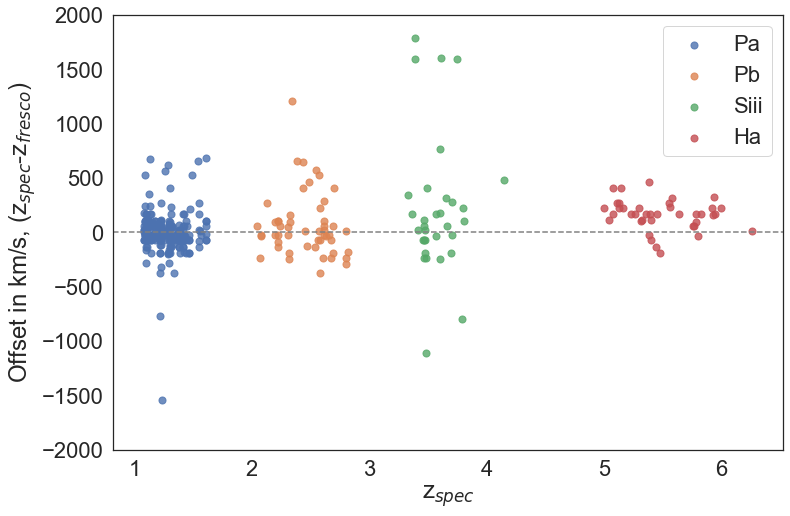

In [50]:
for k in All_data.keys():
    plt.scatter(All_zspec[k],All_voff[k],alpha=0.8,s=50,label=k)
    print(k,np.median(All_dz[k]),np.std(All_dz[k]))


plt.axhline(y=0,ls="--",color="gray")
plt.ylabel(r"Offset in km/s, (z$_{spec}$-z$_{fresco}$)")
plt.xlabel(r"z$_{spec}$")
plt.ylim(-2000,2000)
plt.legend()
plt.show()

Pa -0.0001511076705933423 0.007344282988825882
Pb -0.00028849554443377556 0.006981876885278895
Siii 0.001311687015519869 0.01777256440125361


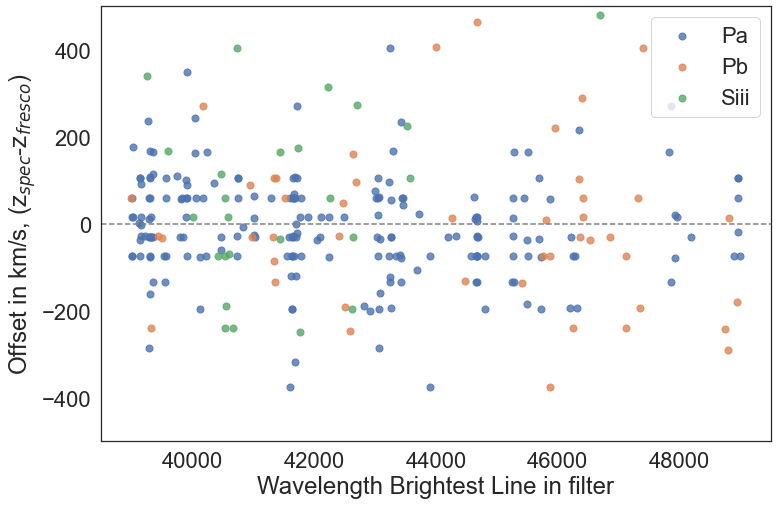

In [51]:
for k in All_data.keys():
    if k=="Ha":
        continue
    plt.scatter(All_data[k],All_voff[k],alpha=0.8,s=50,label=k)
    print(k,np.median(All_dz[k]),np.std(All_dz[k]))


plt.axhline(y=0,ls="--",color="gray")
plt.ylabel(r"Offset in km/s, (z$_{spec}$-z$_{fresco}$)")
plt.xlabel("Wavelength Brightest Line in filter")
plt.ylim(-500,500)
plt.legend()
plt.show()

In [52]:
X,dz,zsp=[],[],[]
for k in All_data.keys():
    X=X+All_data[k]
    dz=dz+All_dz[k]
    zsp=zsp+All_zspec[k]

VelOff=[]

for z,Difz in zip(zsp,dz):
    VelOff.append(Tools.vOffset(z+Difz,z))


No handles with labels found to put in legend.


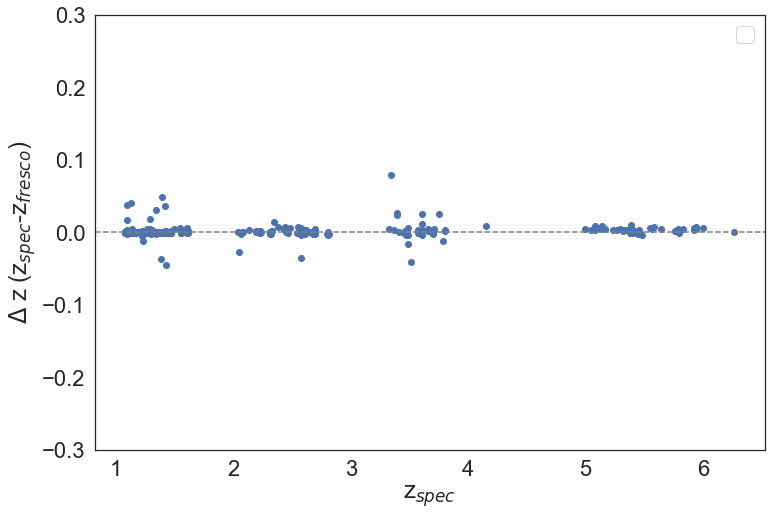

In [53]:
plt.scatter(np.array(zsp),dz)

plt.axhline(y=0,ls="--",color="gray")
plt.ylabel(r"$\Delta$ z (z$_{spec}$-z$_{fresco}$)")
plt.xlabel(r"z$_{spec}$")
plt.ylim(-0.3,0.3)
plt.legend()
plt.show()

In [54]:
import numpy as np
import scipy.stats as stats
from matplotlib.colors import LinearSegmentedColormap

white_viridis = LinearSegmentedColormap.from_list('white_viridis', [
    (0, '#ffffff'),
    (1e-20, '#440053'),
    (0.3, '#404388'),
    (0.4, '#2a788e'),
    (0.6, '#21a784'),
    (0.8, '#78d151'),
    (1, '#fde624'),
], N=256)




## Mask by Quartile 5 - 95 



[-248.41317189    2.7992054   404.5964566 ]


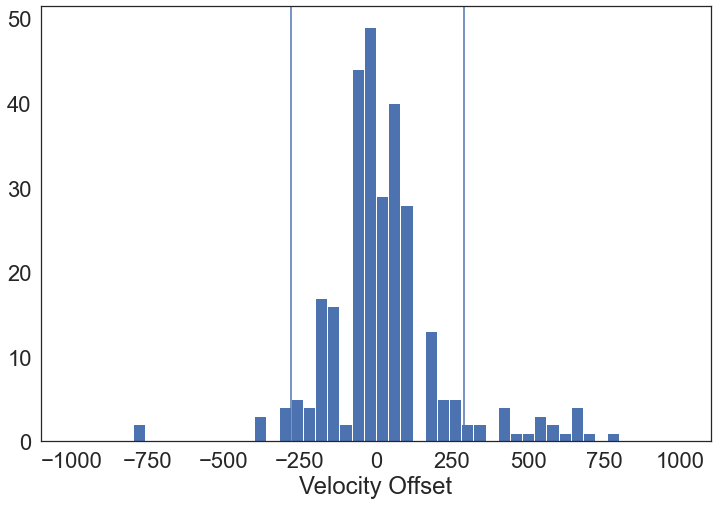

-28.522396361389166 105.30891710564197


In [55]:
Merged_data,Merged_dz,Merged_voff,Merged_coord,Merged_sn,Merged_zspec,Merged_id=Merge_data(All_data,All_dz,All_voff,All_coord,All_sn,All_zspec,All_id)

plt.hist(Merged_voff,bins=50,range=[-1000,1000])




###BE careful here  #####
q=np.percentile(Merged_voff,q=[5,50,90],interpolation="higher")
print(q)

plt.axvline(x=-280)
plt.axvline(x=290)
plt.xlabel("Velocity Offset")
plt.show()
Merged_voff=np.array(Merged_voff)
mask=(Merged_voff>-250)&(Merged_voff<250)

Merged_data=masker(Merged_data,mask)
Merged_dz=masker(Merged_dz,mask)
Merged_voff=masker(Merged_voff,mask)
Merged_coord=masker(Merged_coord,mask)
Merged_sn=masker(Merged_sn,mask)
Merged_zspec=masker(Merged_zspec,mask)
Merged_id=masker(Merged_id,mask)
print(np.median(Merged_voff),np.std(Merged_voff))
np.save("../Catalogs/WaveOff_Merged_Coord.npy",Merged_coord)
np.save("../Catalogs/WaveOff_Merged_Voff.npy",Merged_voff)

In [56]:
max(Merged_voff)

243.0407565978397

In [57]:

binsize=1000
bin_edges = np.arange(min(Merged_data), max(Merged_data)+binsize, binsize)
bin_centers = bin_edges_to_centers(bin_edges)
binned_Data=bin_data(Merged_data,Merged_dz,bin_edges)
binned_voff=bin_data(Merged_data,Merged_voff,bin_edges)

MedianData=[]
for d in binned_Data:
    MedianData.append( np.percentile(d,q=[16,50,84]) )
MedianData=np.array(MedianData)

MedianVoff=[]
for d in binned_voff:
    MedianVoff.append( np.percentile(d,q=[16,50,84]) )
MedianVoff=np.array(MedianVoff)




In [58]:
%load_ext autoreload
%autoreload

difference=-Tools.kmsToangstrom2(np.array(Merged_voff),np.array(Merged_data))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


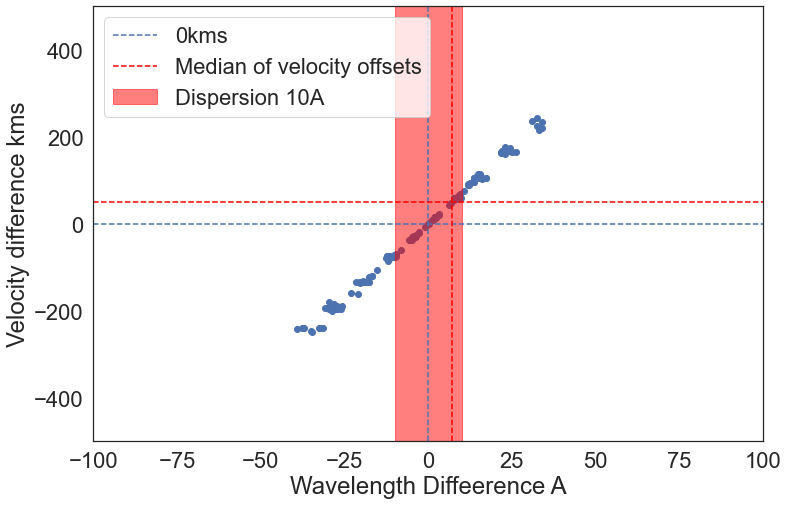

In [59]:
plt.scatter(difference,Merged_voff)
plt.ylim(-500,500)
plt.xlim(-100,100)
plt.axhline(y=0,ls="--",label="0kms")
plt.axvline(x=0,ls="--")

plt.axhline(y=51,ls="--",color="red")
plt.axvline(x=7,ls="--",color="red",label="Median of velocity offsets")
plt.axvspan(-10,10, alpha=0.5, color='red',label="Dispersion 10A")
#plt.axhline(y=30,ls="--")
plt.xlabel("Wavelength Diffeerence A")
plt.ylabel("Velocity difference kms")
plt.legend()
plt.show()

Text(0.5, 0, 'Difference Wavelength')

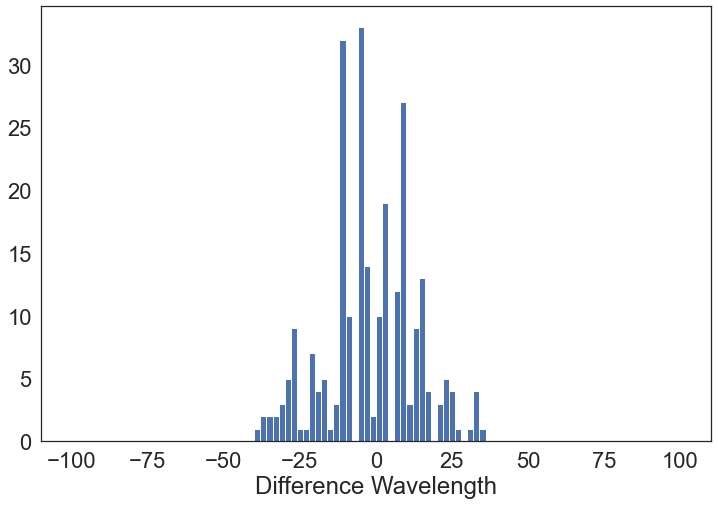

In [60]:
plt.hist(difference,bins=100,range=[-100,100])
plt.xlabel("Difference Wavelength")

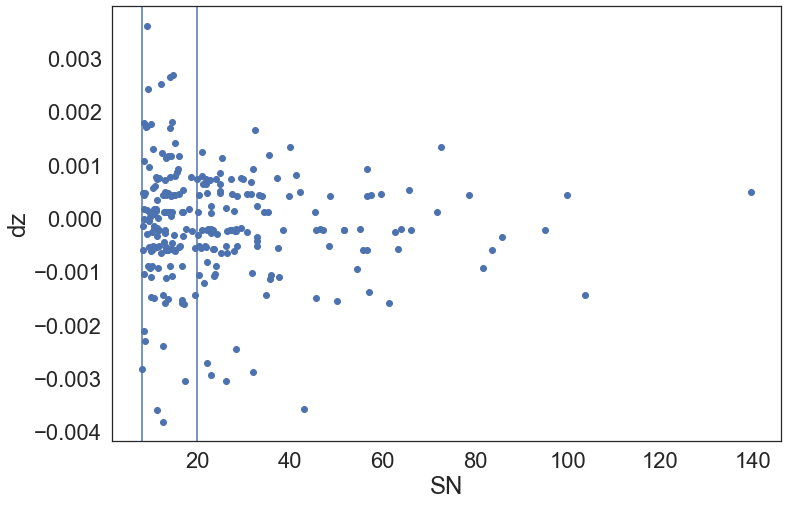

In [61]:
plt.scatter(Merged_sn,Merged_dz)
plt.axvline(x=8)
plt.axvline(x=20)
plt.xlabel("SN")
plt.ylabel("dz")
plt.show()

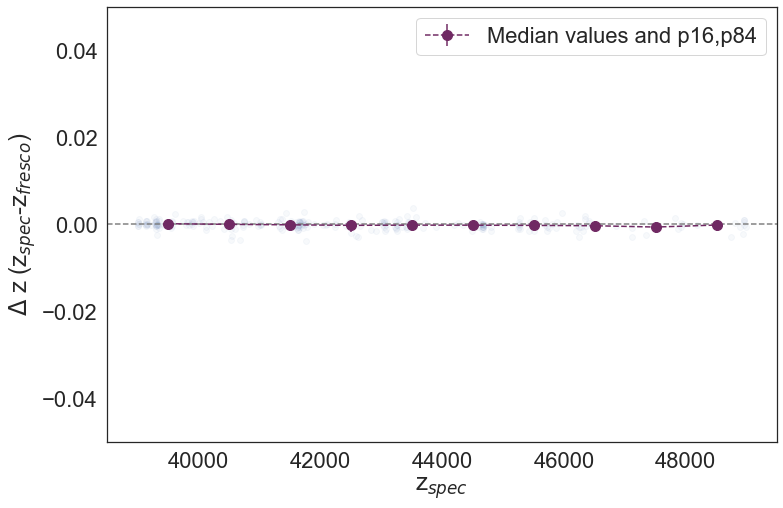

No handles with labels found to put in legend.


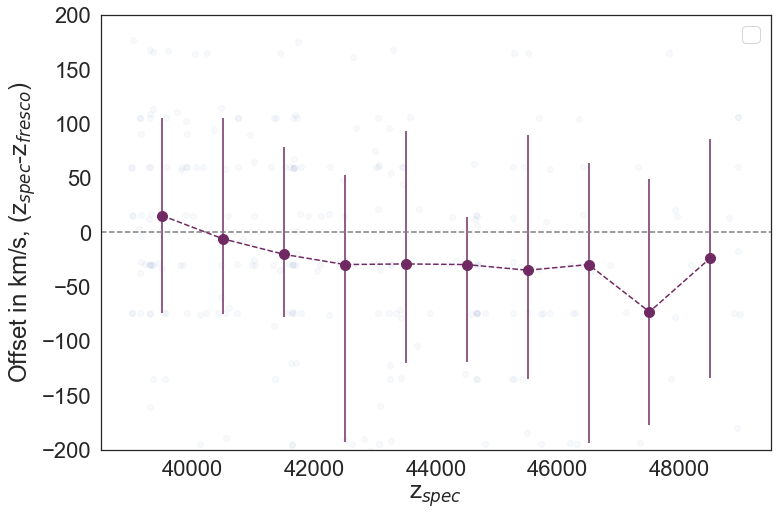

In [62]:

plt.scatter(Merged_data,Merged_dz,alpha=0.04)
plt.errorbar(bin_centers,MedianData[:,1],yerr=[MedianData[:,1]-MedianData[:,0],MedianData[:,2]-MedianData[:,1]],marker="o",ls="--",color="#702963",label="Median values and p16,p84",ms=10)
plt.axhline(y=0,ls="--",color="gray")
plt.ylabel(r"$\Delta$ z (z$_{spec}$-z$_{fresco}$)")
plt.xlabel(r"z$_{spec}$")
plt.ylim(-0.05,0.05)
plt.legend()
plt.show()


plt.scatter(Merged_data,Merged_voff,alpha=0.04)
plt.errorbar(bin_centers,MedianVoff[:,1],yerr=[MedianVoff[:,1]-MedianVoff[:,0],MedianVoff[:,2]-MedianVoff[:,1]],marker="o",ls="--",color="#702963",ms=10)
plt.axhline(y=0,ls="--",color="gray")
plt.ylabel(r"Offset in km/s, (z$_{spec}$-z$_{fresco}$)")
plt.xlabel(r"z$_{spec}$")
plt.ylim(-200,200)
plt.legend()
plt.show()


In [63]:
np.mean(MedianVoff[:,1])

-26.18037505179774

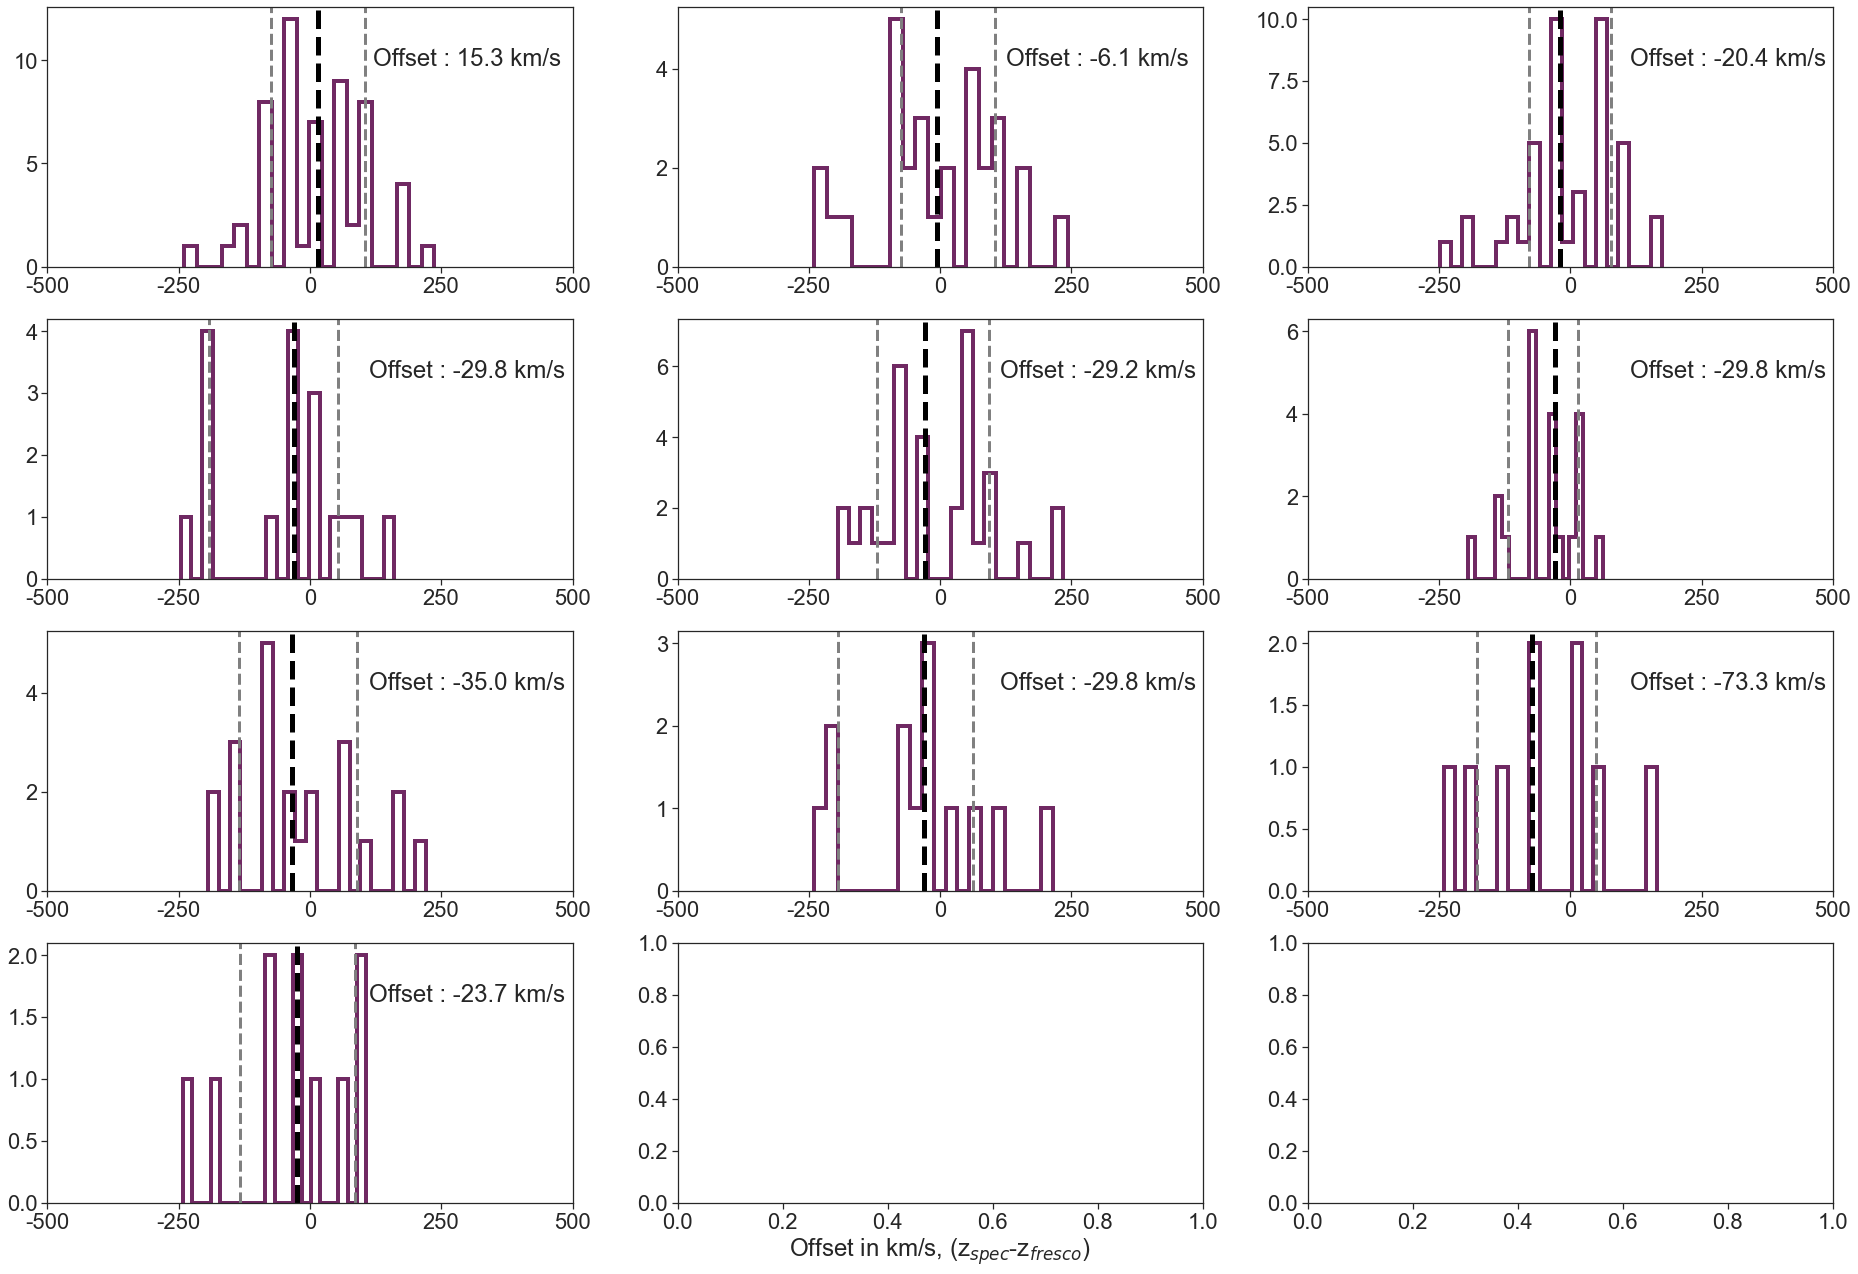

In [64]:
sns.set_style('ticks')

num_plots = len(bin_centers)
num_cols = 3  # Number of columns in the subplots grid
num_rows = (num_plots + num_cols - 1) // num_cols  # Calculate the number of rows

# Create the subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(32, 22))
if num_rows > 1:
    axs = axs.flatten()

for i,dat in enumerate(binned_voff):
    dat=np.array(dat)
    dat=dat[(dat<1000)&(dat>-1000)]

    ax=axs[i]
    ax.hist(dat,bins=20,color="#702963",histtype='step',lw=4)
    ax.axvline(x=np.percentile(dat,50),color="black",lw=5,ls="--")
    ax.axvline(x=np.percentile(dat,16),color="gray",lw=3,ls="--")
    ax.axvline(x=np.percentile(dat,84),color="gray",lw=3,ls="--")

    text="Offset : "+str(np.round(np.percentile(dat,50),1))+" km/s"
    ax.text(0.8, 0.8, text, horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
    ax.set_xticks([-500, -250, 0, 250, 500])
    ax.set_xticklabels(['-500', '-250', '0', '250', '500'])
axs[10].set_xlabel(r"Offset in km/s, (z$_{spec}$-z$_{fresco}$)")
plt.show()



## Running Median

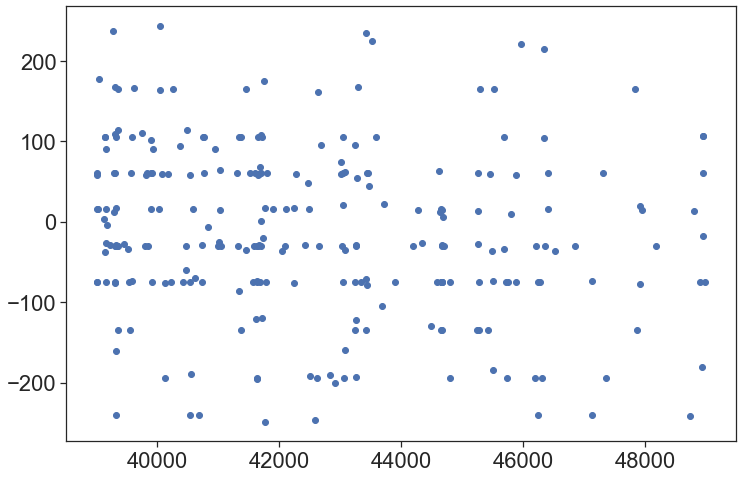

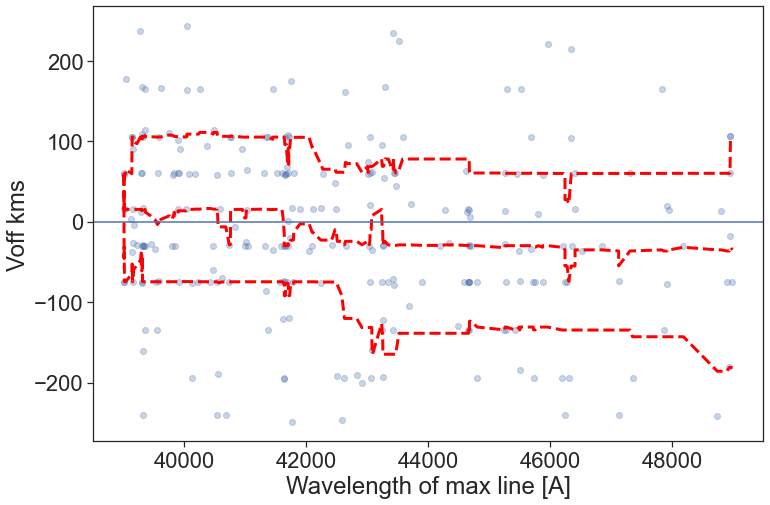

In [65]:
import pandas as pd

toSort=np.transpose(np.array([Merged_data,Merged_dz,Merged_voff]))
Sorted=np.transpose(toSort[np.lexsort(np.transpose(toSort)[::-1])])

SMerged_data,SMerged_dz,SMerged_voff=Sorted

window=50


Rolled_dz=pd.Series(SMerged_dz).rolling(window,min_periods=0).median().values
Rolled_voff=pd.Series(SMerged_voff).rolling(window,min_periods=0).median().values

R=Rolled_16voff=pd.Series(SMerged_voff).rolling(window,min_periods=0)
Rolled_16voff=pd.Series(SMerged_voff).rolling(window,min_periods=0).quantile(0.16).values
Rolled_84voff=pd.Series(SMerged_voff).rolling(window,min_periods=0).quantile(0.84).values


plt.scatter(SMerged_data,SMerged_voff)
plt.show()

plt.scatter(SMerged_data,SMerged_voff,alpha=0.3)
plt.plot(SMerged_data,Rolled_voff,color="red",lw=3,ls="--")
plt.plot(SMerged_data,Rolled_16voff,color="red",lw=3,ls="--")
plt.plot(SMerged_data,Rolled_84voff,color="red",lw=3,ls="--")
plt.axhline(y=0)
plt.ylabel(r"Voff kms")
plt.xlabel("Wavelength of max line [A]")
plt.show()




In [66]:
binsize=1000
bin_edges = np.arange(min(SMerged_data), max(SMerged_data)+binsize, binsize)
bin_centers = bin_edges_to_centers(bin_edges)
binned_Data=bin_data(SMerged_data,SMerged_dz,bin_edges)
binned_voff=bin_data(SMerged_data,SMerged_voff,bin_edges)

MedianData=[]
for d in binned_Data:
    MedianData.append( np.percentile(d,q=[16,50,84]) )
MedianData=np.array(MedianData)

MedianVoff=[]
for d in binned_voff:
    MedianVoff.append( np.percentile(d,q=[16,50,84]) )
MedianVoff=np.array(MedianVoff)


Text(0.5, 0, 'Difference Wavelength')

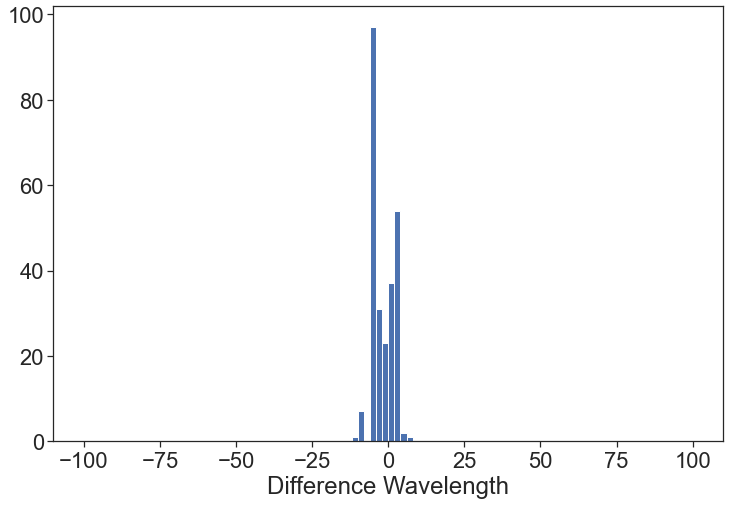

In [67]:
difference=-Tools.kmsToangstrom2(np.array(Rolled_voff),np.array(SMerged_data))
plt.hist(difference,bins=100,range=[-100,100])
plt.xlabel("Difference Wavelength")

No handles with labels found to put in legend.


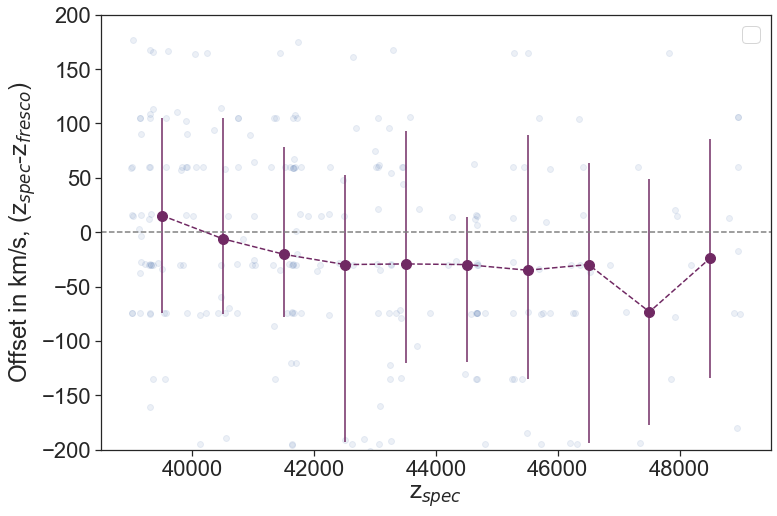

In [68]:
plt.scatter(SMerged_data,SMerged_voff,alpha=0.1)
plt.errorbar(bin_centers,MedianVoff[:,1],yerr=[MedianVoff[:,1]-MedianVoff[:,0],MedianVoff[:,2]-MedianVoff[:,1]],marker="o",ls="--",color="#702963",ms=10)
plt.axhline(y=0,ls="--",color="gray")
plt.ylabel(r"Offset in km/s, (z$_{spec}$-z$_{fresco}$)")
plt.xlabel(r"z$_{spec}$")
plt.ylim(-200,200)
plt.legend()
plt.show()

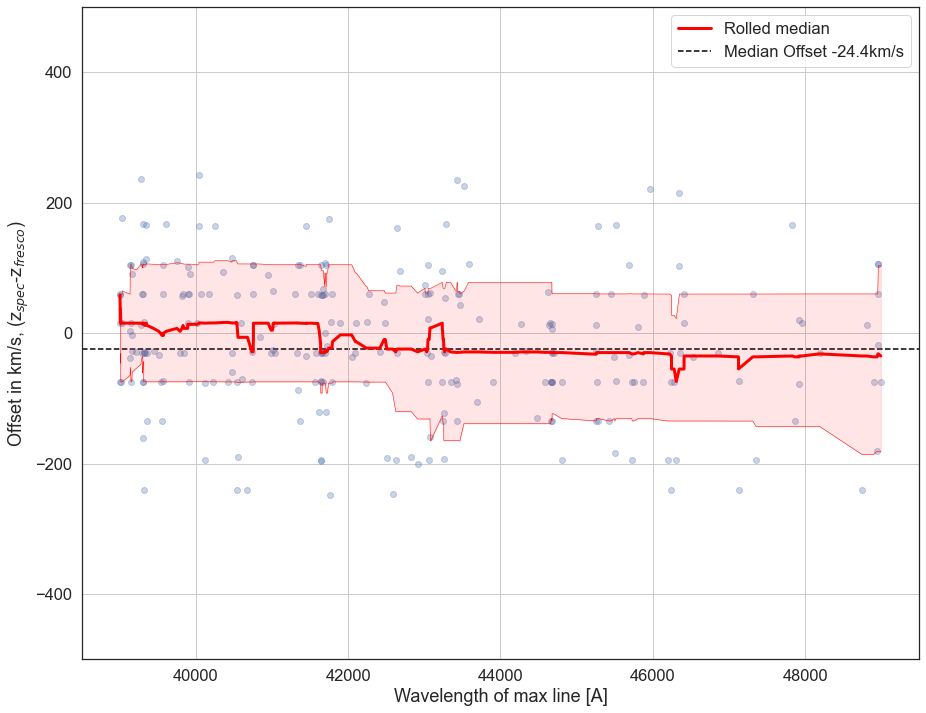

In [69]:
sns.set_theme(style="white",font_scale = 1.5)
plt.rcParams["figure.figsize"] = (15,12)

plt.scatter(SMerged_data,SMerged_voff,alpha=0.3)
#plt.errorbar(bin_centers,MedianVoff[:,1],yerr=[MedianVoff[:,1]-MedianVoff[:,0],MedianVoff[:,2]-MedianVoff[:,1]],marker="o",ls="--",color="#702963",ms=5,zorder=10,label="Binned data")

plt.plot(SMerged_data,Rolled_voff,color="red",lw=3,ls="-",label="Rolled median")
plt.fill_between(SMerged_data,Rolled_16voff, Rolled_84voff,color="red",alpha=0.1)
plt.plot(SMerged_data,Rolled_16voff,ls="-",color="red",lw=0.5)
plt.plot(SMerged_data,Rolled_84voff,ls="-",color="red",lw=0.5)


plt.axhline(y=np.median(Rolled_voff),zorder=0,color="black",ls="--",label="Median Offset "+str(np.round(np.median(Rolled_voff),1))+"km/s")
#plt.axhline(y=0,color="gray",lw=3,ls="--",zorder=0)
plt.grid()
plt.legend()
plt.ylabel(r"Offset in km/s, (z$_{spec}$-z$_{fresco}$)")
plt.xlabel("Wavelength of max line [A]")
plt.ylim(-500,500)
plt.show()

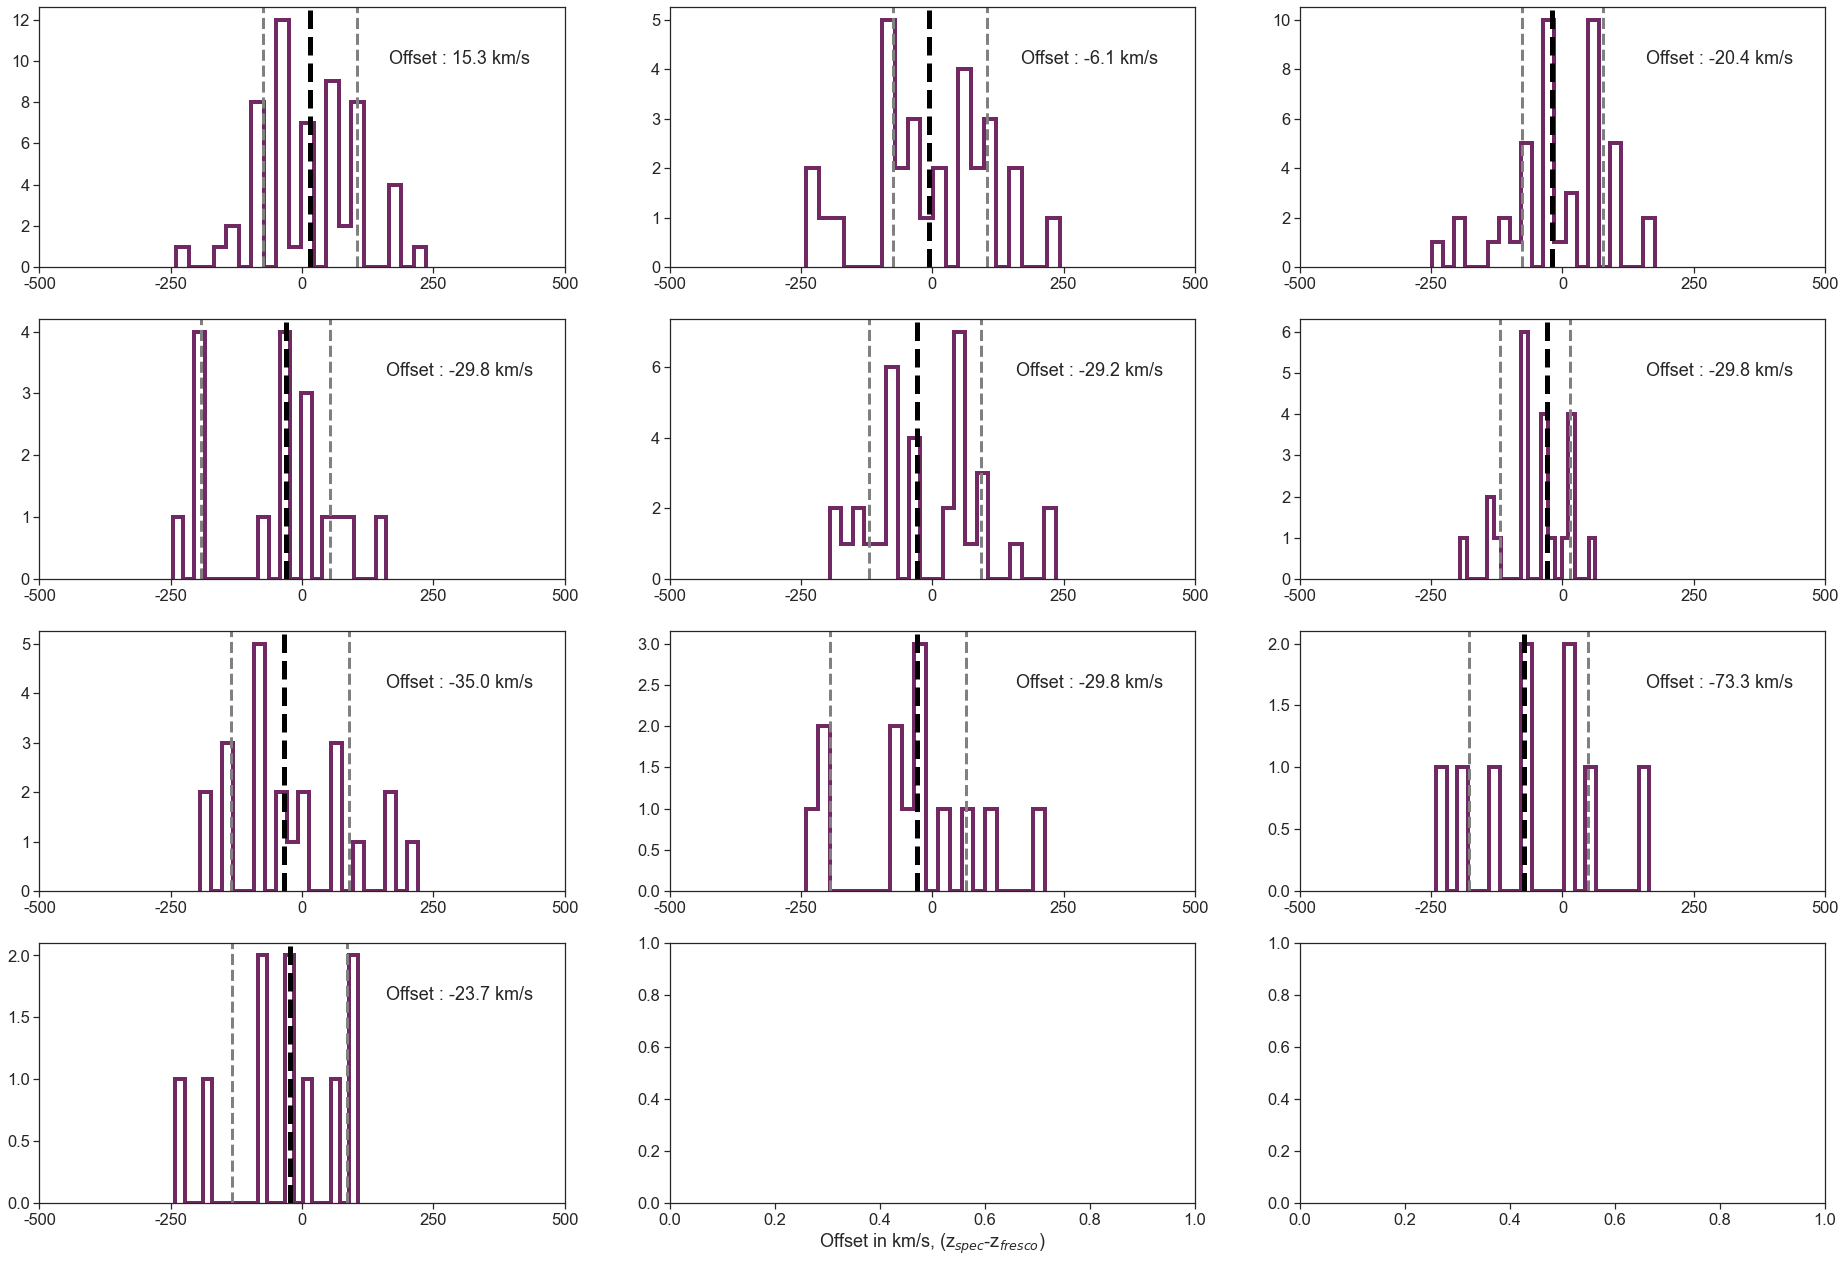

In [93]:
sns.set_style('ticks')

num_plots = len(bin_centers)
num_cols = 3  # Number of columns in the subplots grid
num_rows = (num_plots + num_cols - 1) // num_cols  # Calculate the number of rows

# Create the subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(32, 22))
if num_rows > 1:
    axs = axs.flatten()

for i,dat in enumerate(binned_voff):
    dat=np.array(dat)
    dat=dat[(dat<1000)&(dat>-1000)]

    ax=axs[i]
    ax.hist(dat,bins=20,color="#702963",histtype='step',lw=4)
    ax.axvline(x=np.percentile(dat,50),color="black",lw=5,ls="--")
    ax.axvline(x=np.percentile(dat,16),color="gray",lw=3,ls="--")
    ax.axvline(x=np.percentile(dat,84),color="gray",lw=3,ls="--")

    text="Offset : "+str(np.round(np.percentile(dat,50),1))+" km/s"
    ax.text(0.8, 0.8, text, horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
    ax.set_xticks([-500, -250, 0, 250, 500])
    ax.set_xticklabels(['-500', '-250', '0', '250', '500'])
axs[10].set_xlabel(r"Offset in km/s, (z$_{spec}$-z$_{fresco}$)")
plt.show()

## Modules

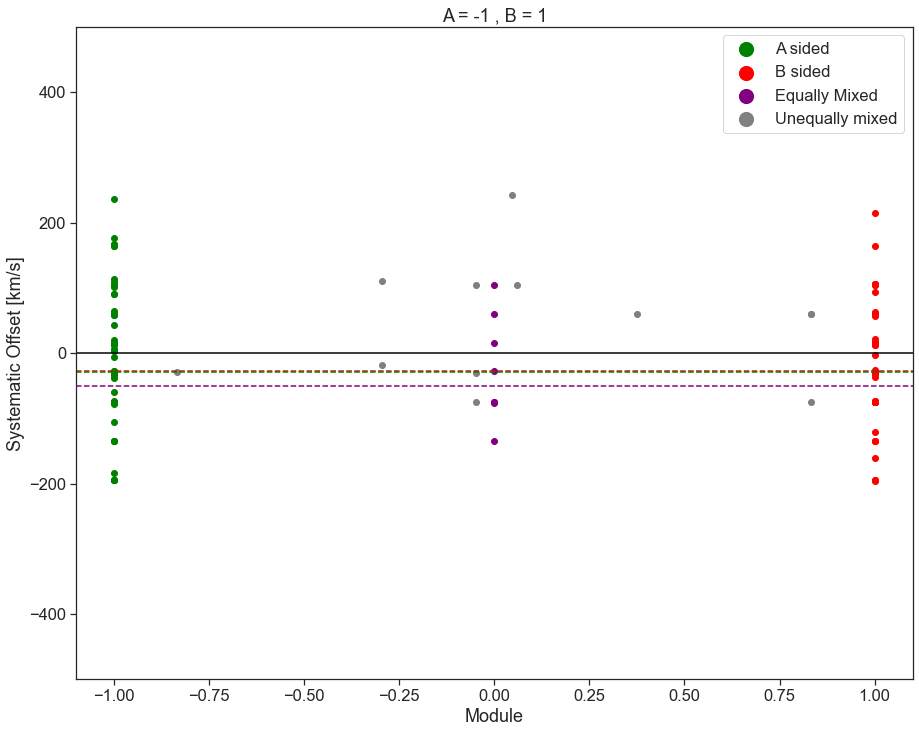

In [94]:
#Data loaded from ExpositionsGrizli.ipynb

modules=np.load("../Catalogs/ExpositionsGrizli_modNums.npy")
As,Bs,mix,var=[],[],[],[]
for m,of in zip(modules,Merged_voff):
    if m<-0.9:
        As.append(of)
        plt.scatter(m,of,color="green")
    elif m>0.9:
        Bs.append(of)
        plt.scatter(m,of,color="red")
    elif m<0.01 and m>-0.01:
        mix.append(of)
        plt.scatter(m,of,color="purple")
    else:
        var.append(of)
        plt.scatter(m,of,color="grey")


plt.scatter(-5000,5000,s=200,color="green",label="A sided")
plt.scatter(-5000,5000,s=200,color="red",label="B sided")
plt.scatter(-5000,5000,s=200,color="purple",label="Equally Mixed")
plt.scatter(-5000,5000,s=200,color="grey",label="Unequally mixed")


plt.axhline(y=np.median(Bs),ls="--",color="red")
plt.axhline(y=np.median(mix),ls="--",color="purple")
plt.axhline(y=np.median(As),ls="--",color="green")
plt.axhline(y=0,ls="-",color="black")
plt.title("A = -1 , B = 1")
plt.xlabel("Module")
plt.ylabel("Systematic Offset [km/s]")
plt.legend()
plt.xlim(-1.1,1.1)
plt.ylim(-500,500)
plt.show()

In [95]:
modules

array([ 1.        ,  1.        ,  0.        ,  0.375     ,  1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
        1.        , -1.        ,  0.        ,  1.        ,  1.        ,
       -1.        , -1.        , -1.        , -0.29411765,  1.        ,
       -1.        , -1.        , -1.        , -1.        ,  1.        ,
        1.        ,  1.        ,  1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
        1.        ,  0.83333333,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        , -1.        ,  1.        ,  1.        , -1.        ,
        1.        , -1.        , -1.        ,  1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        ,  1.        ,  0.        ,  1.        ,
        1.        ,  1.        , -0.04761905, -0.29411765, -0.04

In [96]:
toSort=np.transpose(np.array([Merged_voff,modules]))
Sorted=np.transpose(toSort[np.lexsort(np.transpose(toSort)[:])])

mask= (Sorted[1]>-0.9) & (Sorted[1]<0.9) & (Sorted[1]!=0)
SMerged_voff,SMerged_modules=Sorted[0][mask],Sorted[1][mask]

window=30

Rolled_modules=pd.Series(SMerged_modules).rolling(window,min_periods=0).median().values
Rolled_voff=pd.Series(SMerged_voff).rolling(window,min_periods=0).median().values

def calculate_slope(point1, point2):
    x1, y1 = point1
    x2, y2 = point2
    return (y2 - y1) / (x2 - x1)

def calculate_intercept(point, slope):
    x, y = point
    return y - slope * x

def plot_line(point1, point2):
    slope = calculate_slope(point1, point2)
    intercept = calculate_intercept(point1, slope)
    x_values = [point1[0], point2[0]]
    y_values = [point1[1], point2[1]]
    plt.plot(x_values, y_values, label='Straight Line between points',zorder=0,color="black")
    plt.xlabel('x')
    plt.ylabel('y')



for m,of in zip(modules,Merged_voff):
    if m<-0.9:
        plt.scatter(m,of,color="green")
    elif m>0.9:
        plt.scatter(m,of,color="red")
    elif m<0.01 and m>-0.01:
        plt.scatter(m,of,color="purple")
    else:
        plt.scatter(m,of,color="grey")


plt.scatter(-5000,5000,s=200,color="green",label="A sided")
plt.scatter(-5000,5000,s=200,color="red",label="B sided")
plt.scatter(-5000,5000,s=200,color="purple",label="Equally Mixed")
plt.scatter(-5000,5000,s=200,color="grey",label="Unequally mixed")

plt.plot(SMerged_modules,Rolled_voff,color="black",lw=3,ls="--",label="Rolled median")
plt.scatter(-1,-6,s=150)
plt.scatter(1,113,s=150)
plt.scatter(0,31,s=150)
plot_line((-1,-6),(1,113))
#plt.axhline(y=np.median(Bs),ls="--",color="red")
#plt.axhline(y=np.median(mix),ls="--",color="purple")
#plt.axhline(y=np.median(As),ls="--",color="green")
#plt.axhline(y=0,ls="-",color="black")
plt.title("A = -1 , B = 1")
plt.xlabel("Module")
plt.ylabel("Systematic Offset [km/s]")
plt.legend(fontsize=12)
plt.xlim(-1.1,1.1)
plt.ylim(-500,500)
plt.show()

<ipython-input-96-a16476b0e510>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  toSort=np.transpose(np.array([Merged_voff,modules]))


ValueError: all keys need to be the same shape

(array([ 0.,  0.,  0.,  0.,  0.,  0.,  5.,  4., 14., 13.,  8.,  9.,  4.,
         7.,  1.,  0.,  0.,  0.,  0.,  0.]),
 array([-500., -450., -400., -350., -300., -250., -200., -150., -100.,
         -50.,    0.,   50.,  100.,  150.,  200.,  250.,  300.,  350.,
         400.,  450.,  500.]),
 <BarContainer object of 20 artists>)

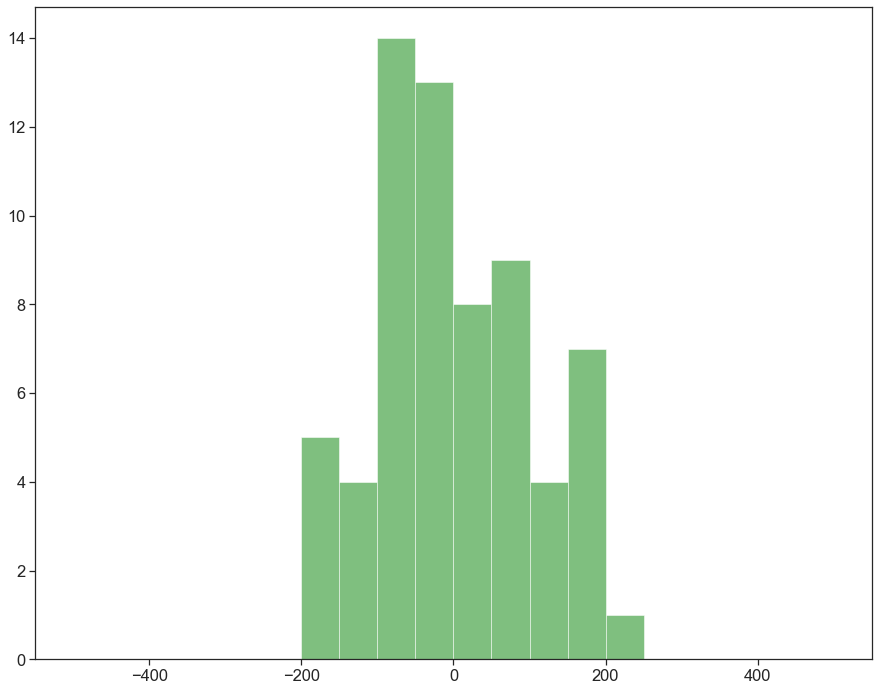

In [97]:

plt.hist(As,alpha=0.5,range=[-500,500],bins=20,color="green")
#plt.hist(Bs,alpha=0.5,range=[-500,500],bins=20,color="red")
#plt.hist(mix,alpha=0.5,range=[-500,500],bins=20,color="purple")
#plt.hist(var,alpha=0.5,range=[-500,500],bins=20,color="gray")

In [98]:
AB=[]

for m,of,w in zip(modules,Merged_voff,Merged_data):
    if m<-0.9:
        AB.append({"Module":"A","voff":of,"wave":w})
    elif m>0.9:
        AB.append({"Module":"B","voff":of,"wave":w})


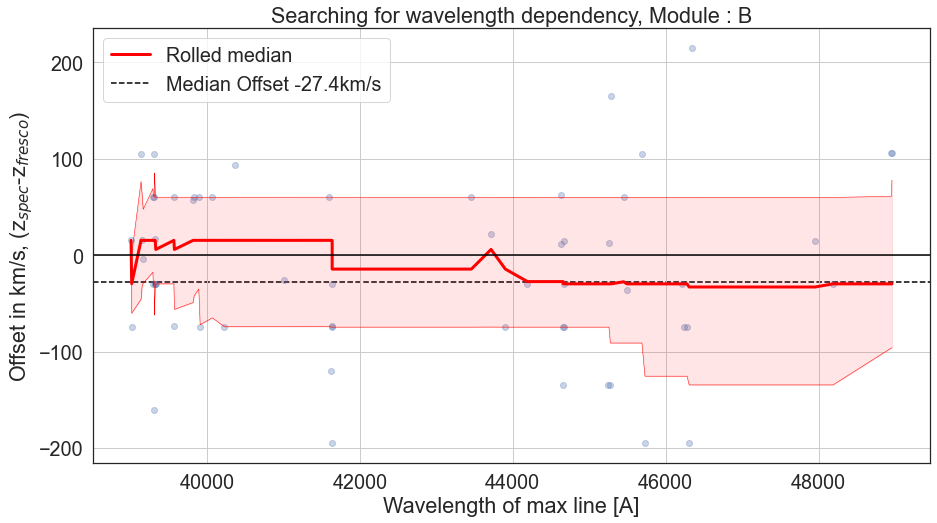

In [99]:
Module="B"
window=30

Mvoff=[gal["voff"] for gal in AB if gal["Module"]==Module]
wave=[gal["wave"] for gal in AB if gal["Module"]==Module]

toSort=np.transpose(np.array([wave,Mvoff]))
Sorted=np.transpose(toSort[np.lexsort(np.transpose(toSort)[::-1])])

wave,Mvoff=Sorted


R_voff=pd.Series(Mvoff).rolling(window,min_periods=0).median().values
R_16voff=pd.Series(Mvoff).rolling(window,min_periods=0).quantile(0.16).values
R_84voff=pd.Series(Mvoff).rolling(window,min_periods=0).quantile(0.84).values

sns.set_theme(style="white",font_scale = 1.8)
plt.rcParams["figure.figsize"] = (15,8)

plt.scatter(wave,Mvoff,alpha=0.3)


plt.plot(wave,R_voff,color="red",lw=3,ls="-",label="Rolled median")
plt.fill_between(wave,R_16voff, R_84voff,color="red",alpha=0.1)
plt.plot(wave,R_16voff,ls="-",color="red",lw=0.5)
plt.plot(wave,R_84voff,ls="-",color="red",lw=0.5)


plt.axhline(y=np.median(Mvoff),zorder=0,color="black",ls="--",label="Median Offset "+str(np.round(np.median(Mvoff),1))+"km/s")
plt.axhline(y=0,color="black")
#plt.axhline(y=0,color="gray",lw=3,ls="--",zorder=0)
plt.grid()
plt.legend()
plt.ylabel(r"Offset in km/s, (z$_{spec}$-z$_{fresco}$)")
plt.xlabel("Wavelength of max line [A]")
plt.title("Searching for wavelength dependency, Module : "+Module)
#plt.ylim(-500,500)
plt.show()





## Map

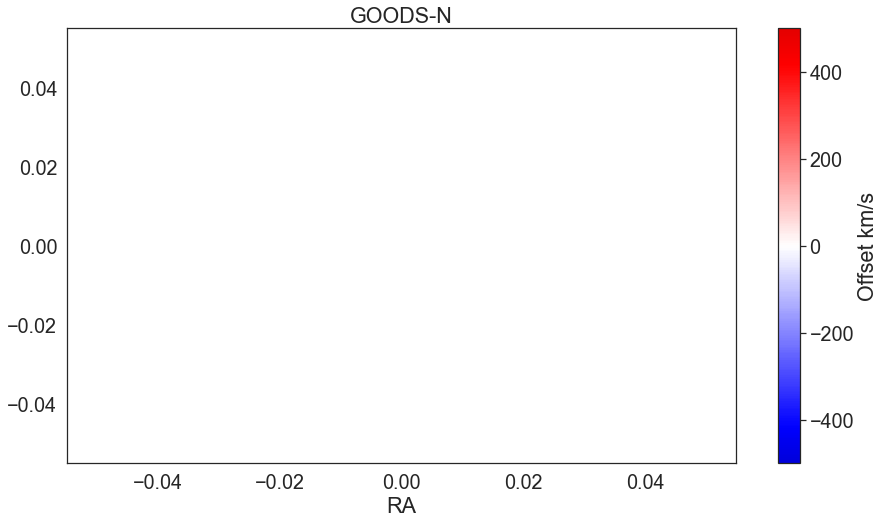

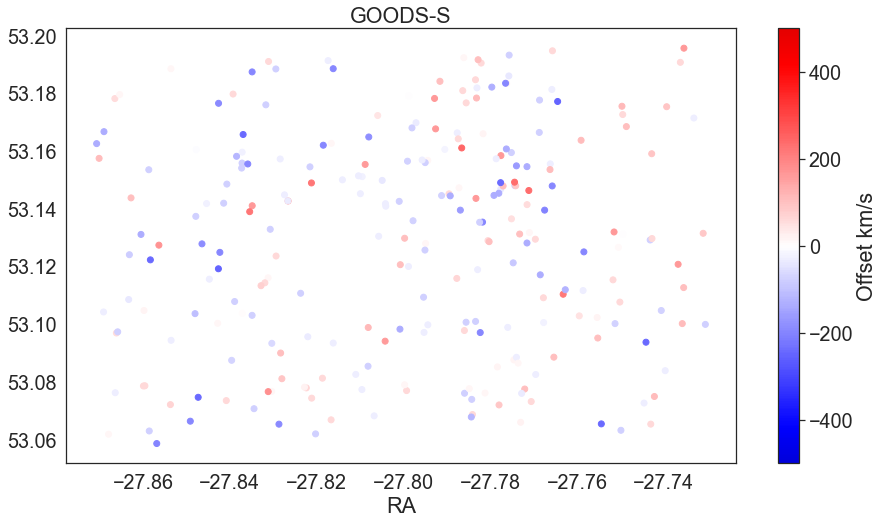

In [100]:
import matplotlib.colors as colors

cmap = plt.get_cmap('seismic')
new_cmap = truncate_colormap(cmap, 0.2, 0.8)



ra=np.array(Merged_coord)[:,0]
dec=np.array(Merged_coord)[:,1]
Z=np.array(Merged_voff)

mask=ra>100
ra=ra[mask]
dec=dec[mask]
Z=Z[mask]



cmap_range = [-500, 500]
norm = plt.Normalize(*cmap_range)

plt.scatter(dec, ra, c=Z,norm=norm, cmap=new_cmap)
cbar = plt.colorbar()
cbar.set_label('Offset km/s')
plt.title("GOODS-N")
plt.xlabel("DEC")
plt.xlabel("RA")
plt.show()

ra=np.array(Merged_coord)[:,0]
dec=np.array(Merged_coord)[:,1]
Z=np.array(Merged_voff)

mask=ra<100
ra=ra[mask]
dec=dec[mask]
Z=Z[mask]



cmap_range = [-500, 500]
norm = plt.Normalize(*cmap_range)

plt.scatter(dec, ra, c=Z,norm=norm, cmap=new_cmap)
cbar = plt.colorbar()
cbar.set_label('Offset km/s')
plt.title("GOODS-S")
plt.xlabel("DEC")
plt.xlabel("RA")
plt.show()


In [101]:
ra

array([53.15735937, 53.07664464, 53.06191281, 53.07691177, 53.10087288,
       53.07892717, 53.0765547 , 53.14709839, 53.14665823, 53.07064308,
       53.14778785, 53.09511659, 53.14791423, 53.1159846 , 53.10011795,
       53.151028  , 53.07311519, 53.14786419, 53.16046101, 53.17897132,
       53.09706787, 53.07387158, 53.14910918, 53.15664931, 53.18177452,
       53.1946199 , 53.18419413, 53.16619837, 53.18336411, 53.17754185,
       53.14453035, 53.10776693, 53.15830813, 53.16757575, 53.16362193,
       53.16411573, 53.15587865, 53.15476153, 53.14366577, 53.15544582,
       53.11028627, 53.09701098, 53.11062493, 53.13726836, 53.16588759,
       53.15714191, 53.18841949, 53.15679032, 53.11550729, 53.14132951,
       53.13527271, 53.13522276, 53.17540806, 53.07745191, 53.13185896,
       53.07594378, 53.1452647 , 53.09432556, 53.17811699, 53.14446375,
       53.12774504, 53.08534943, 53.18590779, 53.11701746, 53.11527163,
       53.10011598, 53.0977177 , 53.08991949, 53.17825582, 53.11

In [102]:
Merged_coord[1]

array([ 53.07664464, -27.83035295])

In [103]:
np.shape(Merged_coord)

(253, 2)